# Introduction

The following notebook presents an exploratory data analysis that aims to find a corellation between deaths caused by various types of diseases and air pollution, particularrily the PM2.5 and PM10. It goes through several stages of the data analysis process, from loading and parsing the data, through cleaning it, and finishes on joining the relevant dataseries and visulaizing the relationship between variables on a series of scatter plots.

# Data used in this study
We use Eurostat as the datasource in our study.
    
    Air pollution data come from https://ec.europa.eu/eurostat/databrowser/view/sdg_11_50/default/table?lang=en
    and contain average yearly concentration of PM2.5 and PM10 in most of the european countries. The data were collected in the years 2000-2017 for PM10 and 2005-2017 for PM2.5
    
    Death by disease data come ftom https://ec.europa.eu/eurostat/web/sdi/good-health-and-well-being and contain records for various diseases as cause of death. It contains data from 2000-2010, thus we only use this subset of data in the air pollution dataset. 
    
# Data processing

    * I exclude countries with insufficinet number of record (Albania, Lichtenstein)
    * I fill the missing values of remaining countries with avergae across years per country
    * I use mean to aggregate the data
    


In [ ]:
import os

import pandas as pd
import numpy as np

COUNTRIES_TO_DROP = ['Albania', 'Liechtenstein']

In [2]:
# Load the excel sheet for deaths caused by different diseases
raw_data_dir = os.path.join(os.getcwd(),'data', 'raw')
print(os.path.exists(raw_data_dir))

path_to_health_data = os.path.join(raw_data_dir, 'eurostat_diseases', 'eurostat_disease_data.xls')
print(os.path.exists(path_to_health_data))

health_xls = pd.ExcelFile(path_to_health_data)

True
True


In [59]:
# Load the excel sheet containing exposure to PM2.5 and PM10 air polution in europe
path_to_air_pollution_data = os.path.join('data', 'interim', 'eurostat_air_pollution.xlsx')
print(path_to_air_pollution_data)
pollution_xls = pd.ExcelFile(path_to_air_pollution_data)
pollution_25_df = pd.read_excel(pollution_xls, 'Sheet 1')
pollution_25_df = pollution_25_df.set_index(pollution_25_df.iloc[:,0])
pollution_25_df = pollution_25_df.iloc[:,1:]

# replacing the values of nan with row average
pollution_25_df = pollution_25_df.replace(':', np.nan)
pollution_25_df.fillna(pollution_25_df.mean(axis=0), axis=0, inplace=True)

for (col_name, col_data) in pollution_25_df.iteritems():
    pollution_25_df[col_name] = pd.to_numeric(pollution_25_df[col_name])

pollution_10_df = pd.read_excel(pollution_xls, 'Sheet 2')
pollution_10_df = pollution_10_df.set_index(pollution_10_df.iloc[:,0])
pollution_10_df = pollution_10_df.iloc[:,1:]
pollution_10_df

# replacing the values of nan with row average
pollution_10_df = pollution_10_df.replace(':', np.nan)
pollution_10_df.fillna(pollution_10_df.mean(axis=0), axis=0, inplace=True)

for (col_name, col_data) in pollution_10_df.iteritems():
    pollution_10_df[col_name] = pd.to_numeric(pollution_10_df[col_name])
    
pollution_10_df

data\interim\eurostat_air_pollution.xlsx


2000   2001       2002  \
time                                                                           
European Union - 28 countries                     28.80000  27.50  27.800000   
Belgium                                           32.60000  33.90  33.000000   
Bulgaria                                          20.40000  28.60  28.814286   
Czechia                                           30.20000  32.70  39.200000   
Denmark                                           28.93125  28.54  24.100000   
Germany (until 1990 former territory of the FRG)  26.80000  25.10  26.700000   
Estonia                                           28.93125  18.20  21.300000   
Ireland                                           28.93125  20.40  19.200000   
Greece                                            28.93125  47.30  44.800000   
Spain                                             38.70000  31.70  31.900000   
France                                            28.93125  21.50  21.500000   
Croatia                                           28.93125  28.54  28.814286   
Italy                                             48.70000  39.40  40.200000   
Cyprus                                            28.93125  28.54  28.814286   
Latvia                                            28.93125  28.54  28.814286   
Lithuania                                         28.93125  28.54  28.814286   
Luxembourg                                        28.93125  28.54  28.814286   
Hungary                                           28.93125  28.54  28.814286   
Malta                                             28.93125  28.54  28.814286   
Netherlands                                       31.00000  30.20  32.400000   
Austria                                           25.90000  33.20  25.600000   
Poland                                            40.80000  37.90  41.700000   
Portugal                                          32.70000  36.50  34.300000   
Romania                                           28.93125  28.54  28.814286   
Slovenia                                          28.93125  28.54  31.000000   
Slovakia                                          29.10000  27.10  28.800000   
Finland                                           14.70000  15.30  15.900000   
Sweden                                            16.90000  17.80  19.300000   
United Kingdom                                    23.20000  24.00  23.200000   
Iceland                                           28.93125  28.54  28.814286   
Norway                                            28.93125  28.54  28.814286   
Switzerland                                       22.40000  22.50  23.200000   

                                                       2003       2004  \
time                                                                     
European Union - 28 countries                     30.200000  26.900000   
Belgium                                           36.100000  31.400000   
Bulgaria                                          58.700000  51.900000   
Czechia                                           41.900000  34.400000   
Denmark                                           24.500000  19.500000   
Germany (until 1990 former territory of the FRG)  29.200000  23.600000   
Estonia                                           19.400000  17.600000   
Ireland                                           18.800000  14.700000   
Greece                                            43.200000  45.100000   
Spain                                             33.000000  32.000000   
France                                            23.600000  20.600000   
Croatia                                           31.811538  28.688889   
Italy                                             39.300000  38.600000   
Cyprus                                            31.811538  28.688889   
Latvia                                            31.811538  28.688889   
Lithuania                                         31.811538  23.300000   
L

In [43]:
# build dataframe of each disease from eurostat
def parse_sheet(workbook, sheet_name):
    lines_to_skip = 8
    list_to_drop = COUNTRIES_TO_DROP
    interim_xls = pd.read_excel(workbook, sheet_name, skiprows=lines_to_skip)
    name_of_disease = interim_xls.iloc[0, 1]
#     print(name_of_disease)
    final_xls = interim_xls.iloc[2:-3,:]
    final_xls = final_xls.set_index(final_xls.iloc[:,0])
    final_xls = final_xls.iloc[:,1:]
    final_xls = final_xls.replace(':', np.nan)
    final_xls.drop(labels=list_to_drop)
    header = final_xls.iloc[0]
    final_xls = final_xls.rename(columns=header)
    final_xls = final_xls.iloc[1:]
    final_xls_rown_mean = final_xls.mean(axis=0)
    final_xls.fillna(final_xls_rown_mean, inplace=True)
    return final_xls, name_of_disease
    
total_deaths, name = parse_sheet(health_xls, 'Data')
total_deaths.head(10)

disease_names_list = []
disease_name_data_dict = {}
for sheetname in health_xls.sheet_names:
    print(sheetname)
    # first sheets are for all age groups, later they are divided into groups whch is less interesting
    if sheetname != 'Data87':
        data, disease_name = parse_sheet(health_xls, sheetname)
        disease_names_list.append(disease_name)
        print(disease_name)
        disease_name_data_dict[disease_name] = data
    else:
        break

Data
All causes of death (A00-Y89) excluding S00-T98
Data2
Certain infectious and parasitic diseases (A00-B99)
Data3
Tuberculosis
Data4
Viral hepatitis and sequelae of viral hepatitis
Data5
Human immunodeficiency virus [HIV] disease
Data6
Other infectious and parasitic diseases (remainder of A00-B99)
Data7
Neoplasms
Data8
Malignant neoplasms (C00-C97)
Data9
Malignant neoplasm of lip, oral cavity, pharynx
Data10
Malignant neoplasm of oesophagus
Data11
Malignant neoplasm of stomach
Data12
Malignant neoplasm of colon, rectosigmoid junction, rectum, anus and anal canal
Data13
Malignant neoplasm of liver and intrahepatic bile ducts
Data14
Malignant neoplasm of pancreas
Data15
Malignant neoplasm of larynx
Data16
Malignant neoplasm of trachea, bronchus and lung
Data17
Malignant melanoma of skin
Data18
Malignant neoplasm of breast
Data19
Malignant neoplasm of cervix uteri
Data20
Malignant neoplasm of other parts of uterus
Data21
Malignant neoplasm of ovary
Data22
Malignant neoplasm of prostate

In [6]:
names_of_selected_groups_of_diseases = [
    'Certain infectious and parasitic diseases (A00-B99)',
    'Neoplasms',
    'Mental and behavioural disorders (F00-F99)',
    'Diseases of the nervous system and the sense organs (G00-H95)',
    'Diseases of the circulatory system (I00-I99)',
    'Diseases of the skin and subcutaneous tissue (L00-L99)',
    'Pregnancy, childbirth and the puerperium (O00-O99)',
    
]

[1576.8 1539.3 1548.8 1500.4 1481.5 1437.8 1427.3 1398.6 1387.2 1328.5]


<Figure size 432x288 with 0 Axes>

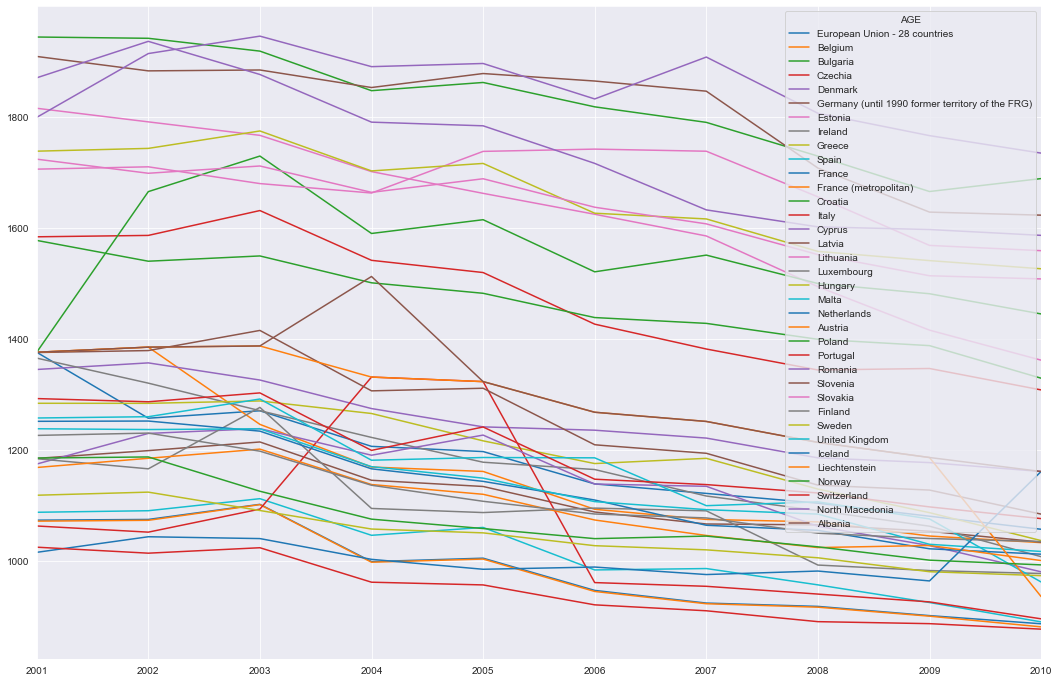

<Figure size 432x288 with 0 Axes>

In [29]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

print(total_deaths.loc['Poland'].values[:])

sns.set_style("darkgrid")
narray = total_deaths
for (col_name, col_data) in total_deaths.iteritems():
    total_deaths[col_name] = pd.to_numeric(total_deaths[col_name])
total_deaths.head()
total_deaths_transposed = total_deaths.transpose()
total_deaths_transposed.plot(figsize=(18, 12))

plt.figure()
# numeric_polution = pollution_10_df.to_numeric()

In [44]:
# aggregate data of respiratory diseases by year (average)
respiratory_disease_id = 'Diseases of the respiratory system (J00-J99)'
respiratory_disease_df = disease_name_data_dict[respiratory_disease_id]
respiratory_disease_df_agg_year_avg = respiratory_disease_df.agg('mean', axis=1)
print(respiratory_disease_df_agg_year_avg)
resp_names = []
for name, val in respiratory_disease_df_agg_year_avg.iteritems():
    resp_names.append(name)

AGE
European Union - 28 countries                        92.188000
Belgium                                             120.383625
Bulgaria                                             63.320000
Czechia                                              77.200000
Denmark                                             124.181212
Germany (until 1990 former territory of the FRG)     76.400000
Estonia                                              45.140000
Ireland                                             177.400000
Greece                                              103.530000
Spain                                               114.510000
France                                               61.640000
France (metropolitan)                                61.590000
Croatia                                              80.098000
Italy                                                70.448717
Cyprus                                               87.753625
Latvia                                             

In [51]:
# Now, aggregate polution data by years

# pollution_10_df = pollution_10_df.to_numeric()
# 1-11 - years 2001 to 2011 - same as in the disease dataset
pollution_10_df_agg_year_avg = pollution_10_df.iloc[:,1:11].agg('mean', axis=1)
pollution_10_df_agg_year_avg.rename(index={1:'AGE'})
pollution_10_df_agg_year_avg.index.names = ['AGE']
pollution_10_df_agg_year_avg.head()
print(type(pollution_10_df_agg_year_avg))
pollution_10_df_agg_year_avg


<class 'pandas.core.series.Series'>


AGE
European Union - 28 countries                       27.870000
Belgium                                             30.330000
Bulgaria                                            48.791429
Czechia                                             32.880000
Denmark                                             21.964000
Germany (until 1990 former territory of the FRG)    24.360000
Estonia                                             17.680000
Ireland                                             16.210000
Greece                                              41.100000
Spain                                               30.560000
France                                              23.070000
Croatia                                             27.902408
Italy                                               37.460000
Cyprus                                              30.162741
Latvia                                              27.268209
Lithuania                                           24.456582
Luxe

In [52]:
# 0-6 - data for pm2.5 in years 2005-2010
pollution_25_df_agg_year_avg = pollution_25_df.iloc[:,0:6].agg('mean', axis=1)
pollution_25_df_agg_year_avg.rename(index={1:'AGE'})
pollution_25_df_agg_year_avg.index.names = ['AGE']
pollution_25_df_agg_year_avg.head()
print(type(pollution_25_df_agg_year_avg))
pollution_25_df_agg_year_avg


<class 'pandas.core.series.Series'>


AGE
European Union - 28 countries                       16.350000
Belgium                                             16.710000
Bulgaria                                            25.971719
Czechia                                             20.006111
Denmark                                             11.926111
Germany (until 1990 former territory of the FRG)    15.818333
Estonia                                             12.646719
Ireland                                             15.284328
Greece                                              19.654162
Spain                                               14.766111
France                                              15.740000
Croatia                                             16.551264
Italy                                               24.519052
Cyprus                                              17.604328
Latvia                                              16.662104
Lithuania                                           16.551264
Luxe

In [22]:
pollution_names = []
for name, val in pollution_10_df_agg_year_avg.iteritems():
    pollution_names.append(name)

In [12]:
commons_names = list(set(pollution_names).intersection(resp_names))
print(commons_names)

['Iceland', 'Cyprus', 'Slovenia', 'Portugal', 'Ireland', 'Italy', 'Romania', 'Sweden', 'Malta', 'Hungary', 'Germany (until 1990 former territory of the FRG)', 'Bulgaria', 'Denmark', 'Poland', 'Norway', 'Spain', 'Slovakia', 'Finland', 'Belgium', 'Czechia', 'Latvia', 'Netherlands', 'Lithuania', 'Austria', 'France', 'Luxembourg', 'Greece', 'Estonia', 'European Union - 28 countries', 'Croatia', 'United Kingdom', 'Switzerland']


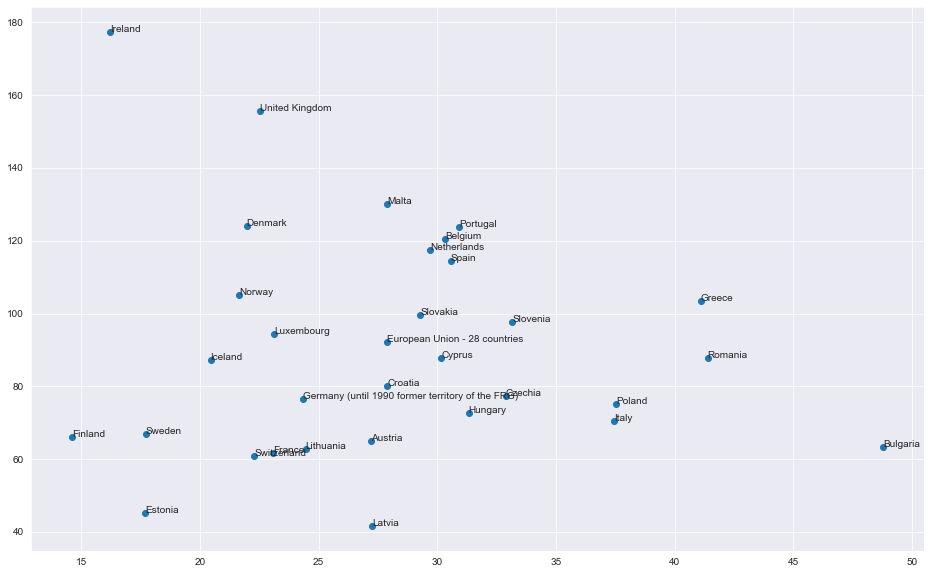

In [53]:
common = pd.concat([respiratory_disease_df_agg_year_avg, pollution_10_df_agg_year_avg], join='inner', axis=1)
common.head()
fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(x=common.iloc[:,1], y=common.iloc[:,0])

for i, txt in enumerate(common.index):
    ax.annotate(txt, (common.iloc[i,1], common.iloc[i,0]))


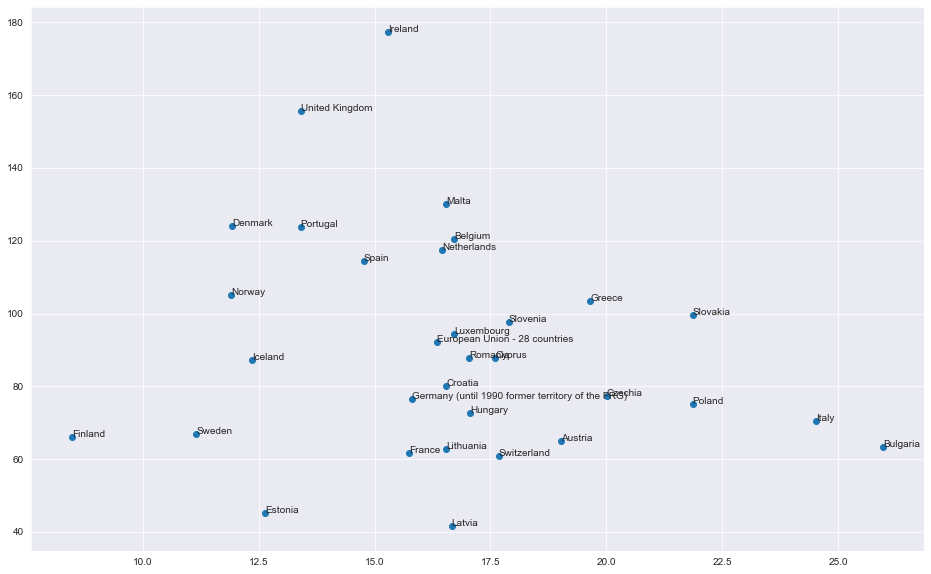

In [54]:
common = pd.concat([respiratory_disease_df_agg_year_avg, pollution_25_df_agg_year_avg], join='inner', axis=1)
common.head()
fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(x=common.iloc[:,1], y=common.iloc[:,0])

for i, txt in enumerate(common.index):
    ax.annotate(txt, (common.iloc[i,1], common.iloc[i,0]))

From the chain of actions defined above, we need to perform the following actions to plot the scatter plot above:
    * aggreagate disease data as average of years
    * perform an inner join with aggregated polution data
    * scatter plot the variables
    * annotate the plot with country labels

In [56]:
def aggregate_disease_year_average(disease_dataset, disease_id):
    disease_df = disease_dataset[disease_id]
    disease_df_agg_year_avg = disease_df.agg('mean', axis=1)
    return disease_df_agg_year_avg

def inner_join(disease, pollution):
    common = pd.concat([disease, pollution], join='inner', axis=1)
    return common

def scatter_plot(
    disease_vs_pollution_dataframe, 
    title=None, 
    y_label='Number of deaths per 100000 inhabitants', 
    x_label='air pollution density'
    ):
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.scatter(x=disease_vs_pollution_dataframe.iloc[:,1], y=disease_vs_pollution_dataframe.iloc[:,0])
    
    for i, txt in enumerate(disease_vs_pollution_dataframe.index):
        ax.annotate(txt, (disease_vs_pollution_dataframe.iloc[i,1], disease_vs_pollution_dataframe.iloc[i,0]))
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    if title is not None:
        ax.set_title(title)

Now, when we have the needed function, we can try to look for some trends

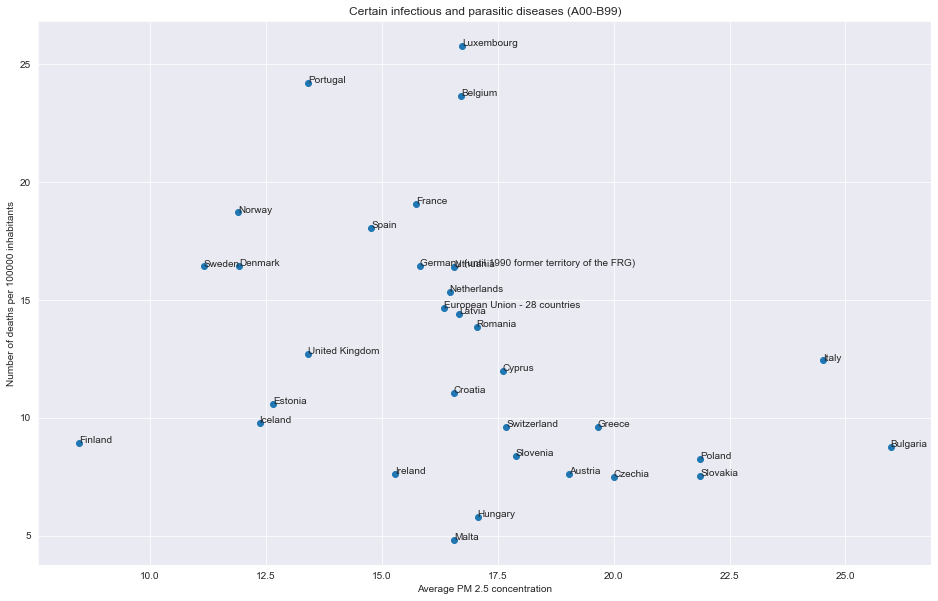

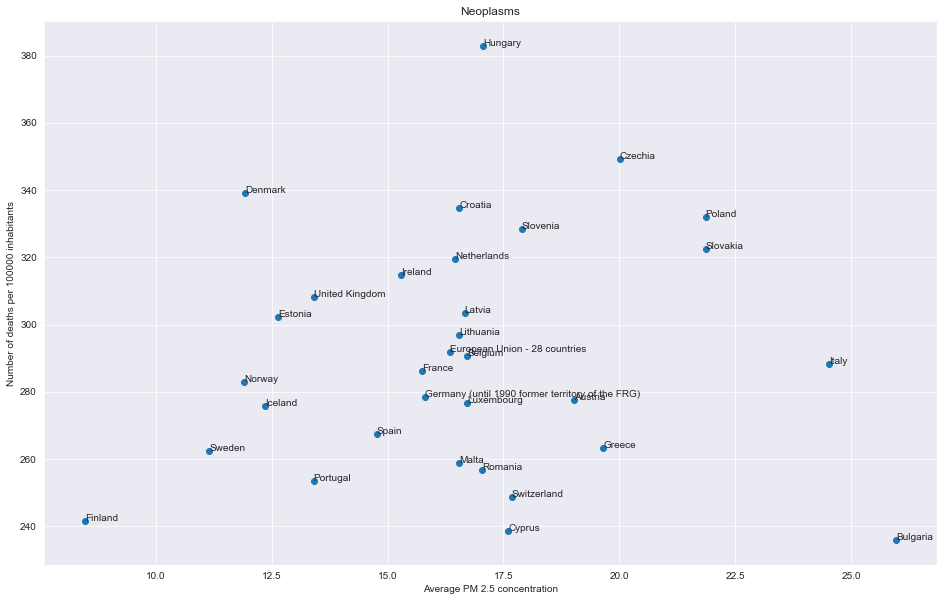

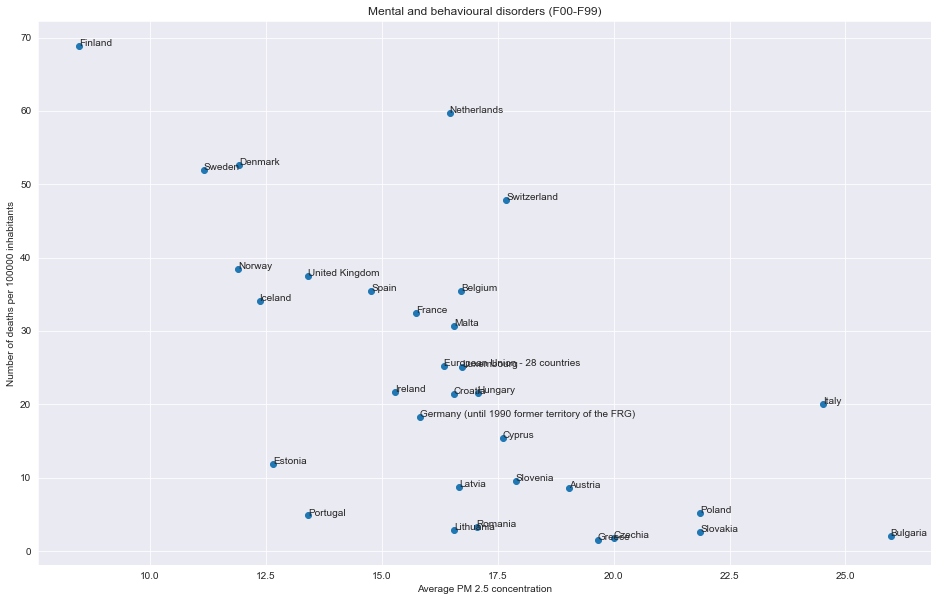

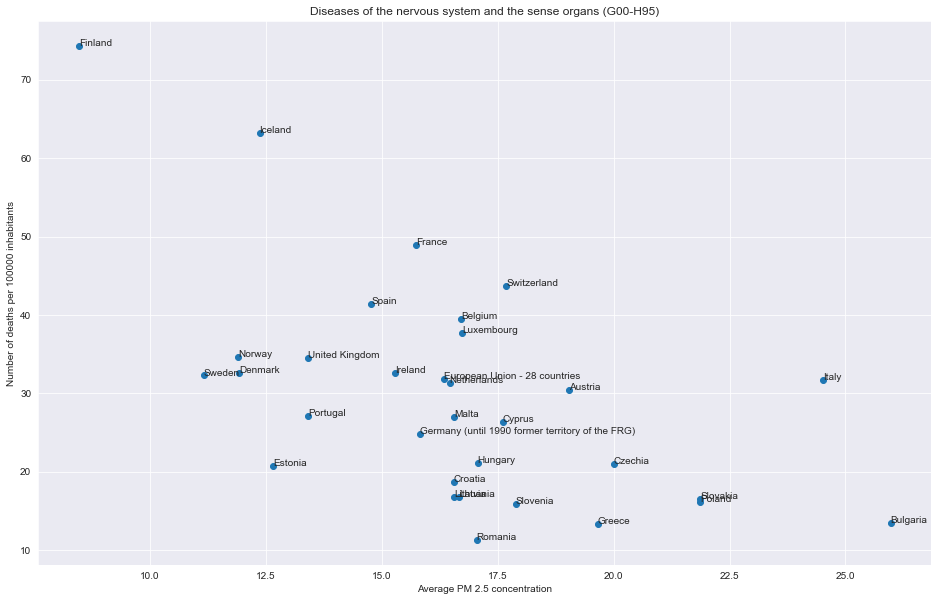

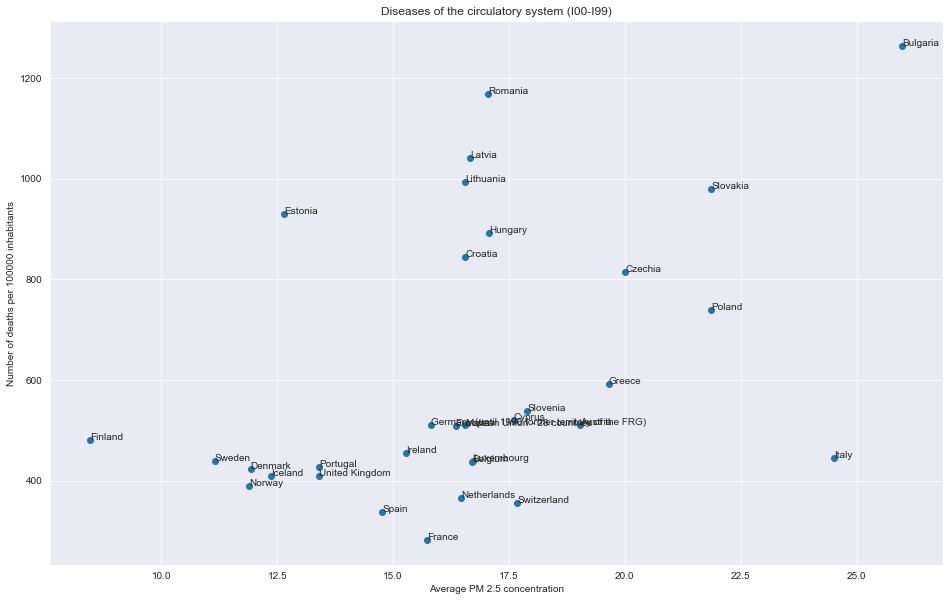

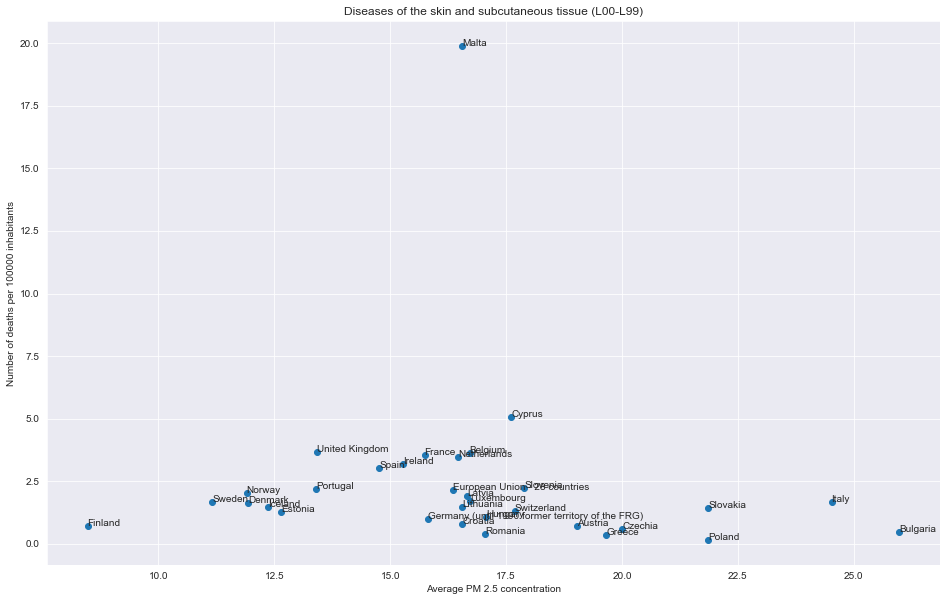

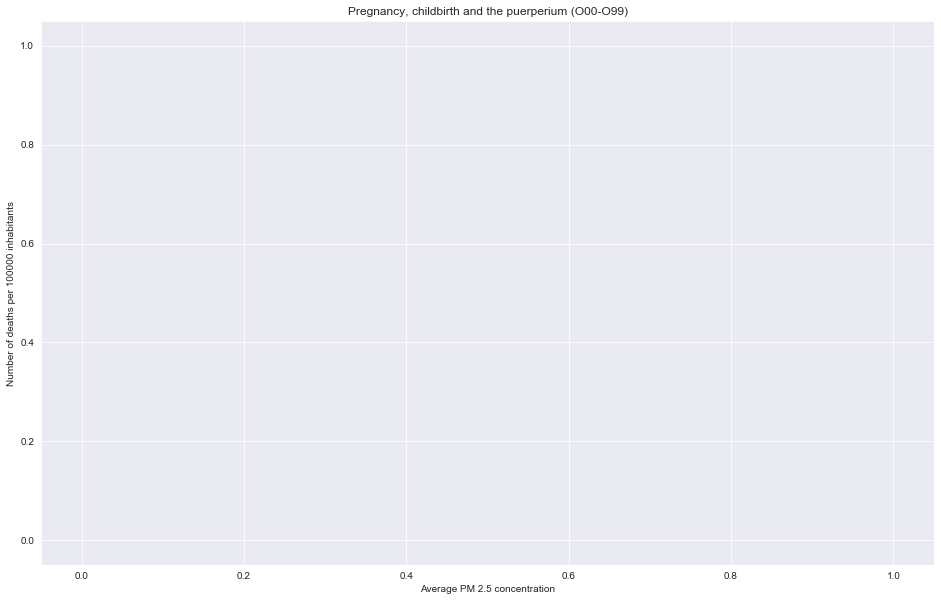

In [57]:
# plot scatter plots of sleected grioups of diseases as a death cause vs pm 2.5   
for disease_id in names_of_selected_groups_of_diseases:
    disease_agg_year = aggregate_disease_year_average(disease_name_data_dict, disease_id)
    disease_pollution_joined = inner_join(disease_agg_year, pollution_25_df_agg_year_avg)
    scatter_plot(
        disease_pollution_joined,
        title=disease_id,
        x_label='Average PM 2.5 concentration'
    )

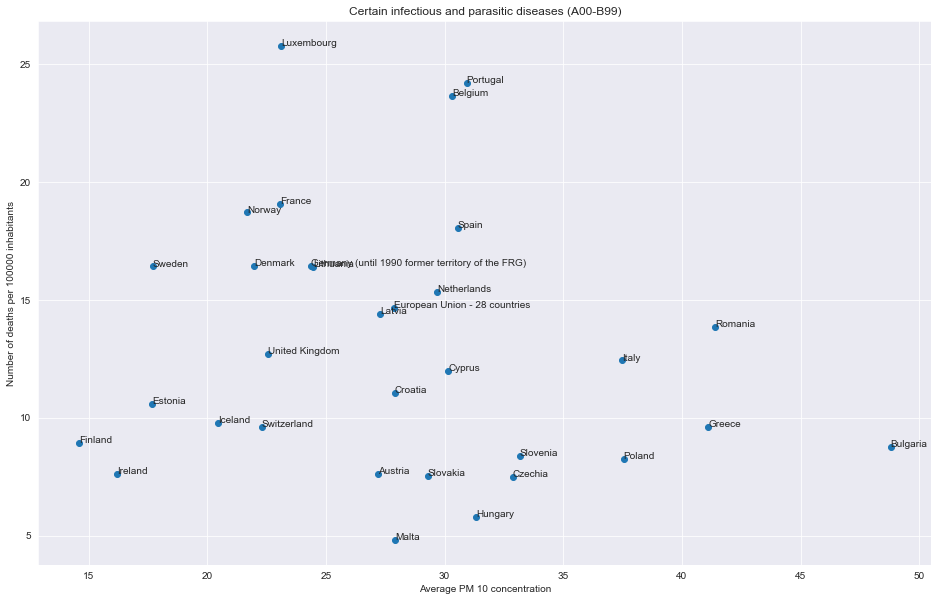

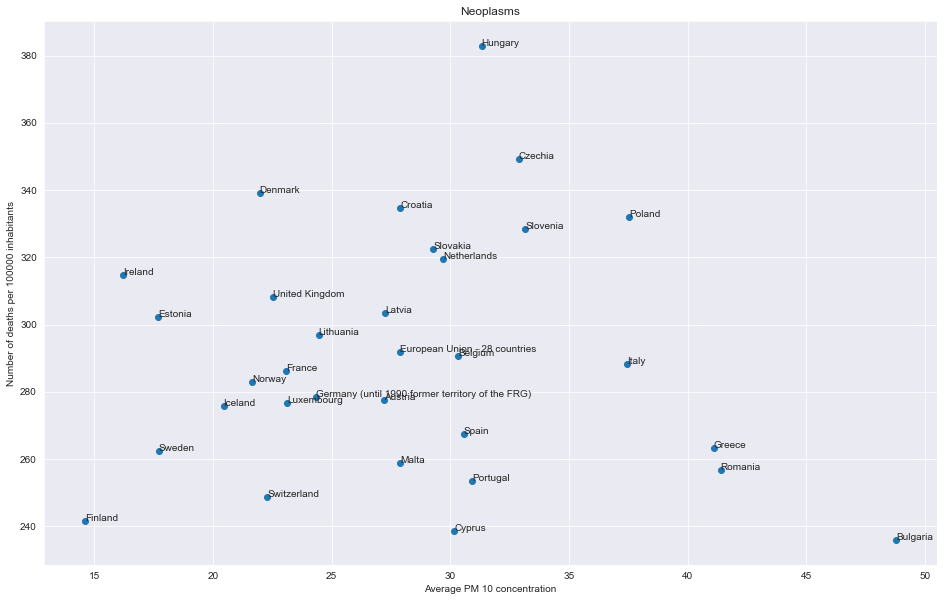

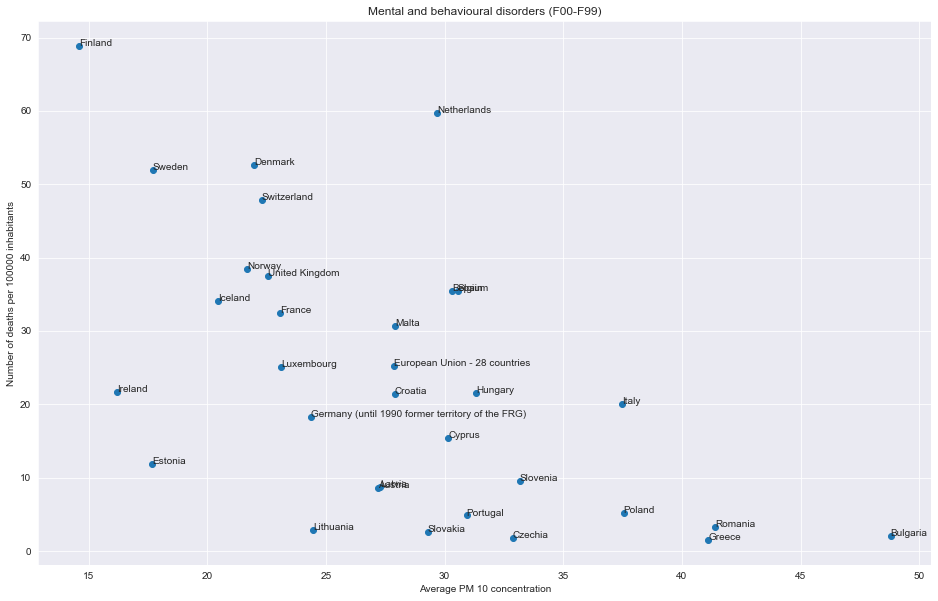

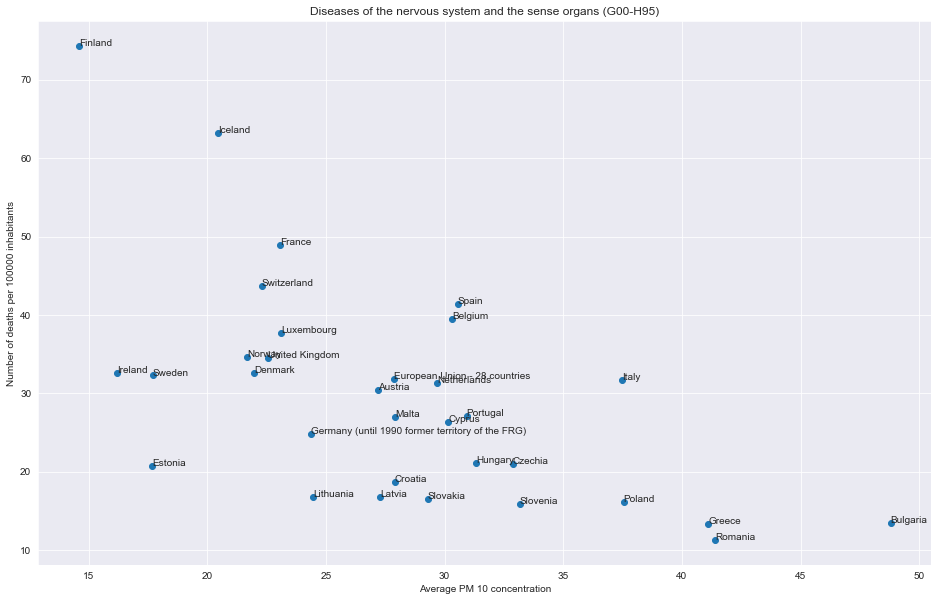

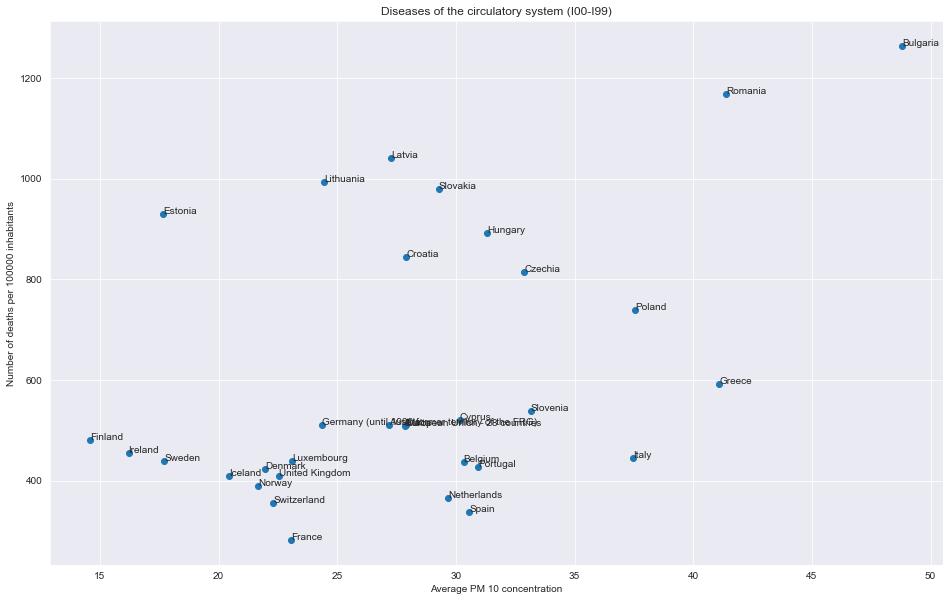

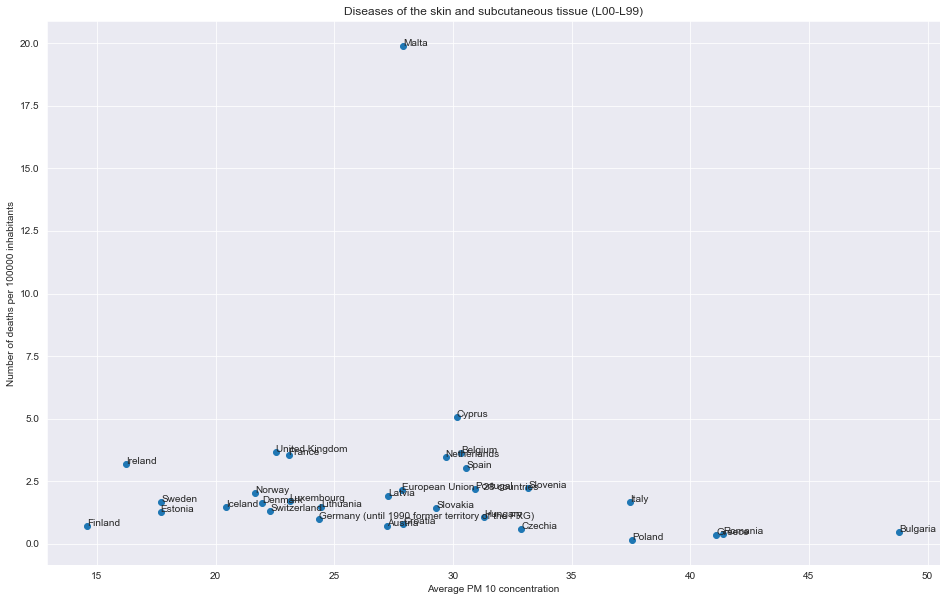

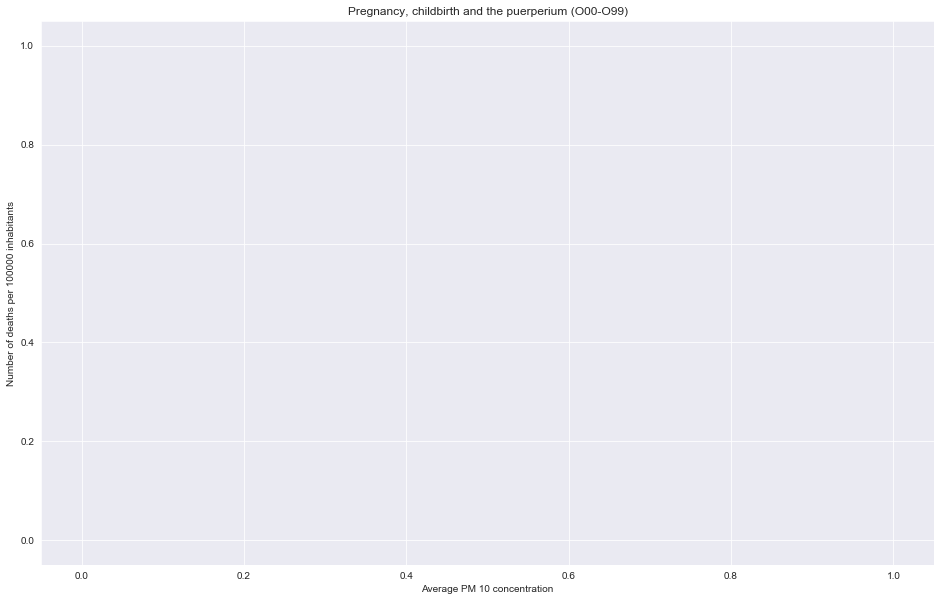

In [58]:
# plot scatter plots of sleected grioups of diseases as a death cause vs pm 10   
for disease_id in names_of_selected_groups_of_diseases:
    disease_agg_year = aggregate_disease_year_average(disease_name_data_dict, disease_id)
    disease_pollution_joined = inner_join(disease_agg_year, pollution_10_df_agg_year_avg)
    scatter_plot(
        disease_pollution_joined,
        title=disease_id,
        x_label='Average PM 10 concentration'
    )